# Analysis of the 'hotter is better' pattern in arthropod traits

In [48]:
# Load libraries
require(tidyverse)
require(cowplot)
require(patchwork)

In [49]:
speciesmass <- as_tibble(read_csv('../data/TraitData.csv')) %>%
  select(originaltraitname, originaltraitvalue, interactor1) %>%
  filter(originaltraitname == 'body size' & originaltraitvalue != 'NA')


sizeMeans <- 
  speciesmass %>% 
  group_by(interactor1) %>% 
  summarise(avg = mean(originaltraitvalue), sd = sd(originaltraitvalue)) %>%
  arrange(avg)

head(sizeMeans)

write_csv(sizeMeans, '../data/sizeMeans.csv')

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


interactor1,avg,sd
<chr>,<dbl>,<dbl>
Amblyseius womersleyi,0.005060000,0.0004733286
Amblyseius swirskii,0.005842105,0.0007951770
Kampimodromus aberrans,0.009100000,NA
Bemisia argentifolii,0.020000000,NA
Tetranychus evansi,0.024300000,0.0002828427
Tetranychus mcdanieli,0.024300000,0.0002828427


# Development time ($\alpha$)

In [50]:
bodyMass <- sizeMeans %>% 
  rename(species = interactor1) %>%
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Macrocentrus iridescens' ~ '26',
                              species == 'Otiorhynchus sulcatus' ~ '27',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Gastrolina depressa' ~ '29',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Amblyseius swirskii' ~ '33',
                              species == 'Macrosiphum euphorbia' ~ '34',
                              species == 'Myzus persicae' ~ '35',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Leptinotarsa decemlineata' ~ '42',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')

In [51]:
head(bodyMass)

massspecies,avg,sd,masscurve_ID
<chr>,<dbl>,<dbl>,<chr>
Aedes albopictus,2.202857,0.5610916231,1
Bemisia tabaci,0.293125,0.0298445377,10
Tetraneura nigriabdominalis,0.867300,0.3252394195,11
Stethorus punctillum,0.480000,0.0424264069,12
Tetranychus mcdanieli,0.024300,0.0002828427,13
Tetranychus urticae,0.024300,0.0002828427,14


In [52]:

Tc <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Macrocentrus iridescens' ~ '26',
                              species == 'Otiorhynchus sulcatus' ~ '27',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Gastrolina depressa' ~ '29',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Amblyseius swirskii' ~ '33',
                              species == 'Macrosiphum euphorbia' ~ '34',
                              species == 'Myzus persicae' ~ '35',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Leptinotarsa decemlineata' ~ '42',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) 


In [53]:
head(Tc)

X,param,conf_lower,conf_upper,method,estimate,species,trait,curve_ID
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,rmax,0.1148495,0.1778902,residual bootstrap,0.1309269,Aedes albopictus,juvenile development rate,1
2,topt,29.8737413,33.5605898,residual bootstrap,31.1600000,Aedes albopictus,juvenile development rate,1
3,ctmin,-2.7340000,9.3644365,residual bootstrap,4.2840000,Aedes albopictus,juvenile development rate,1
4,ctmax,35.9970992,45.0527747,residual bootstrap,41.1210000,Aedes albopictus,juvenile development rate,1
5,thermal_safety_margin,2.6073458,14.8214061,residual bootstrap,9.9610000,Aedes albopictus,juvenile development rate,1
6,thermal_tolerance,30.9724764,46.4300000,residual bootstrap,36.8370000,Aedes albopictus,juvenile development rate,1


In [54]:
# Extract relevant data 
a_pk <- Tc %>% filter(param == 'rmax') %>% 
  rename(a_pk = estimate, a_pkLwr = conf_lower,a_pkUpr = conf_upper) %>% 
  select(a_pk, a_pkLwr, a_pkUpr, species, curve_ID)

T_pk <- Tc %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

Tc <- bind_cols(a_pk, T_pk, bodyMass)

Tc <- Tc %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(Tc, '../data/a_pksT_pksMass.csv')


In [55]:
head(T_pk)

T_pk,T_pkLwr,T_pkUpr
<dbl>,<dbl>,<dbl>
31.160,29.87374,33.56059
29.751,29.37129,30.66478
30.648,30.51723,30.78992
32.875,32.78152,33.01626
35.182,34.89144,35.70428
31.467,29.80140,33.61485



Call:
lm(formula = log(a_pk) ~ T_pk, data = Tc)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1723 -0.2510  0.2076  0.7560  1.9232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.00392    1.29252  -3.871  0.00032 ***
T_pk         0.08635    0.04250   2.032  0.04760 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.046 on 49 degrees of freedom
Multiple R-squared:  0.07771,	Adjusted R-squared:  0.05889 
F-statistic: 4.129 on 1 and 49 DF,  p-value: 0.0476


`geom_smooth()` using formula = 'y ~ x'


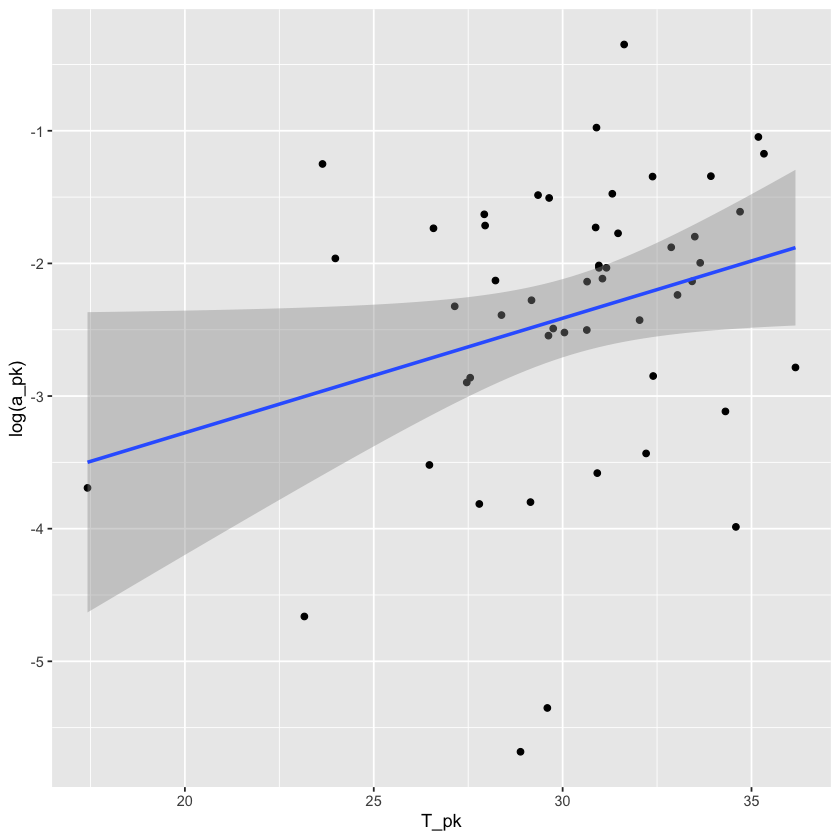

In [56]:
# fit linear model (note that alpha_pk is linear in log-log scale)
TcLm <- lm(log(a_pk) ~ T_pk, data = Tc); summary(TcLm)

Tc %>%
  ggplot(aes(x=T_pk,y = log(a_pk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [57]:
a_data <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) # load in data 
a_data$kT <- 1/(8.617333262145 * 10^-5 * (a_data$T_pk+273.15))
head(a_data)

a_pk,a_pkLwr,a_pkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11484955,0.17789019,Aedes albopictus,1,31.160,29.87374,33.56059,2.202857,38.13387
0.08282502,0.07943271,0.09426917,Bemisia tabaci,10,29.751,29.37129,30.66478,0.293125,38.31126
0.11794938,0.11686865,0.11889559,Tetraneura nigriabdominalis,11,30.648,30.51723,30.78992,0.867300,38.19814
0.15281755,0.14413105,0.16531167,Stethorus punctillum,12,32.875,32.78152,33.01626,0.480000,37.92016
0.35107259,0.32206148,0.38494603,Tetranychus mcdanieli,13,35.182,34.89144,35.70428,0.024300,37.63644
0.16981269,0.14984768,0.19132875,Tetranychus urticae,14,31.467,29.80140,33.61485,0.024300,38.09544


`geom_smooth()` using formula = 'y ~ x'


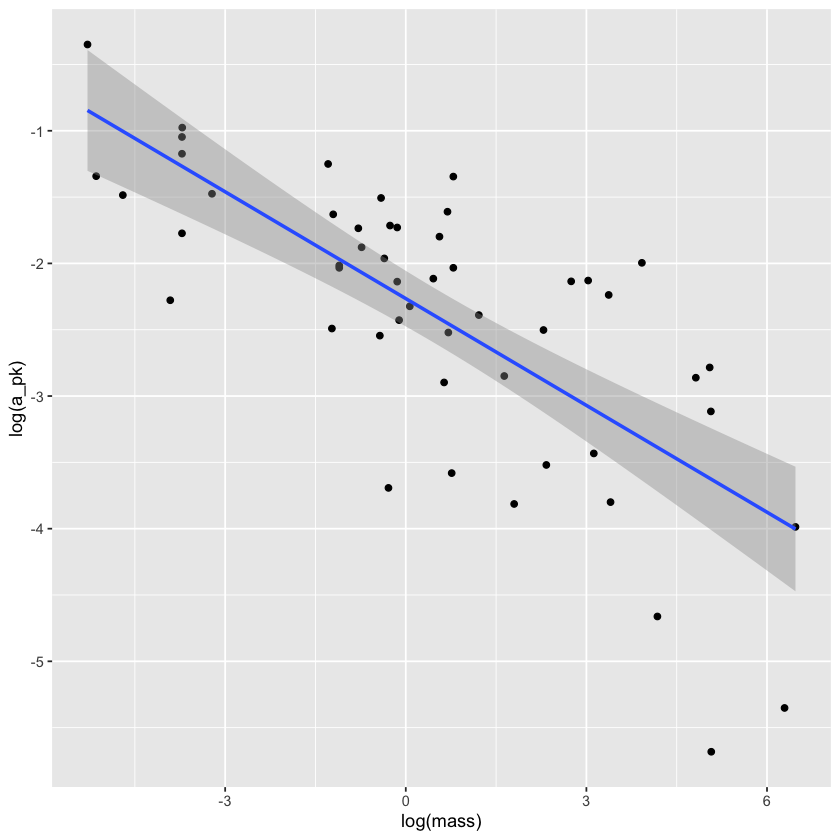

In [58]:
#plot uncorrected data in log-log scale
a_data %>%
  ggplot(aes(x=log(mass), y = log(a_pk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


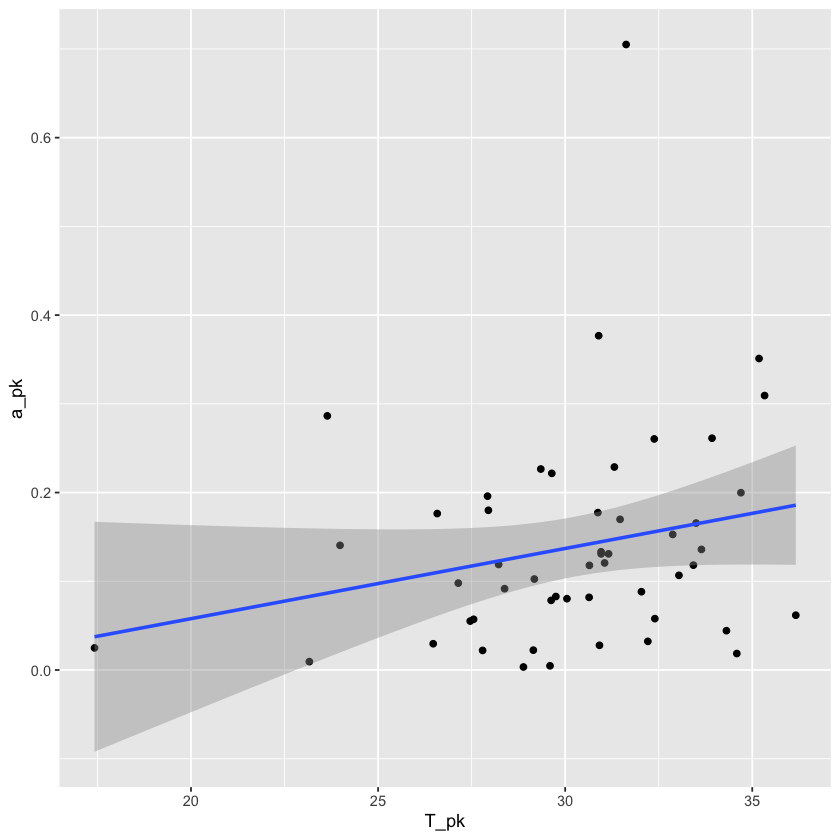

In [59]:
#plot a_pk vs Tpk
a_data %>%
  ggplot(aes(x = T_pk, y = a_pk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [60]:
# linear model (note the allometry is linear in log-log scale)
a_model <- lm(log(a_pk) ~ log(mass) + kT, data = a_data)
summary(a_model)
coef(a_model)
save(a_model,file="../results/a_MTE_model.Rdata")


Call:
lm(formula = log(a_pk) ~ log(mass) + kT, data = a_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94315 -0.36004 -0.03904  0.44925  1.24025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.6947     8.2172   2.884  0.00587 ** 
log(mass)    -0.2685     0.0322  -8.339 6.81e-11 ***
kT           -0.6786     0.2148  -3.159  0.00273 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6755 on 48 degrees of freedom
Multiple R-squared:  0.6234,	Adjusted R-squared:  0.6077 
F-statistic: 39.73 on 2 and 48 DF,  p-value: 6.618e-11


(Intercept)   log(mass)          kT 
 23.6947357  -0.2684996  -0.6785646

In [61]:
a_cf <-  confint(a_model,level = .95)
anova(a_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,31.706182,31.7061823,69.478758,6.887511e-11
kT,1,4.555298,4.5552980,9.982168,2.734931e-03
Residuals,48,21.904490,0.4563435,NA,NA


In [62]:
coef(a_model)[2]

log(mass) 
-0.2684996

In [63]:
alpha_lm <- lm(log(a_pk/mass^coef(a_model)[2]) ~ T_pk, data=a_data); summary(alpha_lm)
confint(alpha_lm,level = .95)


Call:
lm(formula = log(a_pk/mass^coef(a_model)[2]) ~ T_pk, data = a_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93864 -0.37830 -0.04083  0.44669  1.23914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.88735    0.82575  -5.919 3.12e-07 ***
T_pk         0.08677    0.02715   3.196  0.00244 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6685 on 49 degrees of freedom
Multiple R-squared:  0.1725,	Adjusted R-squared:  0.1556 
F-statistic: 10.21 on 1 and 49 DF,  p-value: 0.00244


,2.5 %,97.5 %
(Intercept),-6.54675027,-3.2279503
T_pk,0.03221154,0.1413305


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


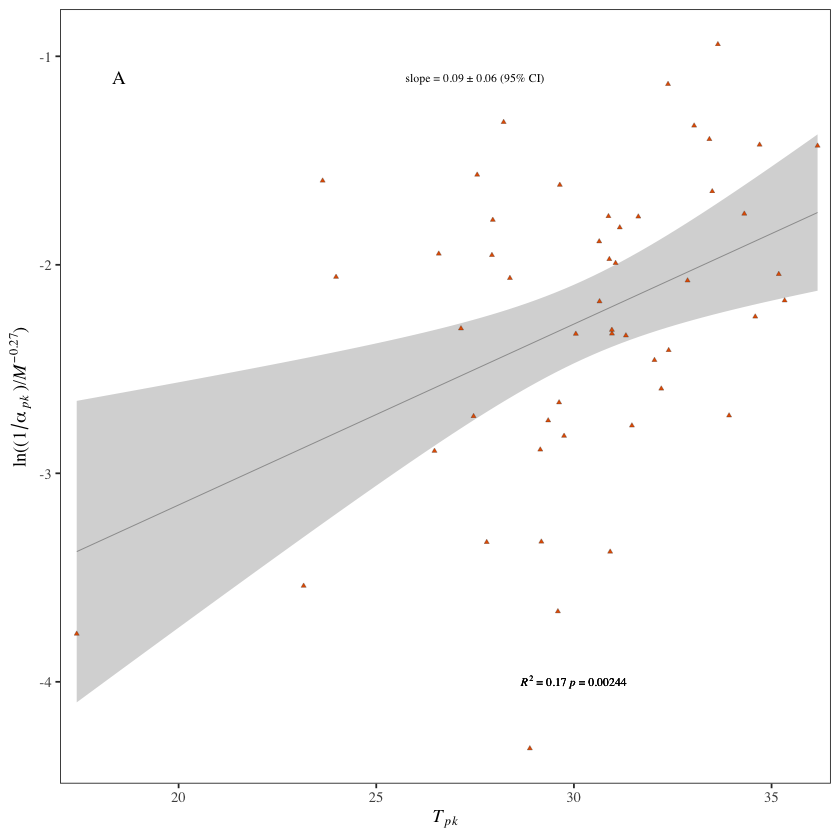

In [64]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedApkTpk <- a_data %>%
  ggplot(aes(x = T_pk, y = log(a_pk/mass^coef(a_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15) +
  scale_y_continuous(expression(plain(paste("ln((", italic(1/alpha[' '][pk])~")/",
                                            italic(M^-0.27),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits =c(17,36.5),
                     expand = c(0, 0),
                     breaks=seq(20,35, by=5))+
  theme_bw()+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank())+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 24, fill="#e66101")+
  annotate("text", x = 18.5, y = -1.1, label = 'A', size=4, family='Times')+
  annotate("text", x = 30, y = -4, label = italic("R")^2~"= 0.17"~italic("p")~"= 0.00244", size=2.5, family='Times')+
  annotate("text", x = 27.5, y = -1.1, label = "slope = 0.09 ± 0.06 (95% CI)", size=2.5, family='Times')
  
MassCorrectedApkTpk


## Peak fecundity ($b_{max}$)

In [65]:
bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Hylobius transversovittatus' ~ '46',
                              species == 'Callosobruchus maculatus' ~ '47',   
                              species == 'Callosobruchus chinensis' ~ '48',   
                              species == 'Callosobruchus analis' ~ '49',      
                              species == 'Callosobruchus rhodesianus' ~ '50',
                              species == 'Sepedon spinipes' ~ '51',
                              species == 'Plutella xylostella' ~ '52',
                              species == 'Scapsipedus icipe' ~ '53',
                              species == 'Hyperaspis notata' ~ '54',
                              species == 'Toxoptera citricida' ~ '55',
                              species == 'Ophraella communa' ~ '56',
                              species == 'Bemisia argentifolii' ~ '57',
                              species == 'Dactylopius austrinus' ~ '58',
                              species == 'Aulacorthum solani' ~ '59')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA') %>%
  rename(massspecies = species, masscurve_ID = curve_ID) 

In [66]:

bmax <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Hylobius transversovittatus' ~ '46',
                              species == 'Callosobruchus maculatus' ~ '47',   
                              species == 'Callosobruchus chinensis' ~ '48',   
                              species == 'Callosobruchus analis' ~ '49',      
                              species == 'Callosobruchus rhodesianus' ~ '50',
                              species == 'Sepedon spinipes' ~ '51',
                              species == 'Plutella xylostella' ~ '52',
                              species == 'Scapsipedus icipe' ~ '53',
                              species == 'Hyperaspis notata' ~ '54',
                              species == 'Toxoptera citricida' ~ '55',
                              species == 'Ophraella communa' ~ '56',
                              species == 'Bemisia argentifolii' ~ '57',
                              species == 'Dactylopius austrinus' ~ '58',
                              species == 'Aulacorthum solani' ~ '59')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA')


In [67]:
b_pk <- bmax %>% filter(param == 'rmax') %>% 
  rename(bmax = estimate, bmaxLwr = conf_lower, bmaxUpr = conf_upper) %>% 
  select(bmax, bmaxLwr, bmaxUpr, species, curve_ID)

T_pk <- bmax %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

bmax_data <- bind_cols(b_pk, T_pk, bodyMass)

bmax_data <- bmax_data %>% rename(mass = avg)  %>% select(-masscurve_ID)

write_csv(bmax_data, '../data/bmaxT_pksMass.csv')



`geom_smooth()` using formula = 'y ~ x'


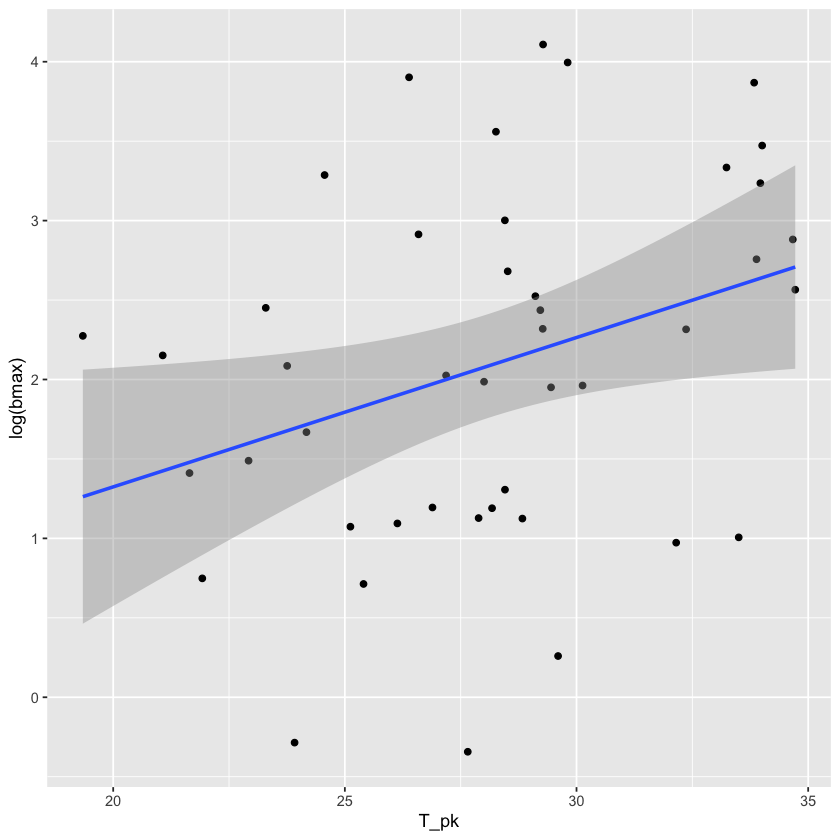

In [68]:
bmax_data %>%
  ggplot(aes(x=T_pk,y = log(bmax)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [69]:
bmax_data <- as_tibble(read.csv('../data/bmaxT_pksMass.csv')) # load in data 
bmax_data$kT <- 1/(8.617333262145 * 10^-5 * (bmax_data$T_pk+273.15))
head(bmax_data)

bmax,bmaxLwr,bmaxUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.355172,17.998032,Bemisia tabaci,10,34.721,34.35364,35.78279,0.293125,37.69279
3.079183,2.494742,3.597847,Tetraneura nigriabdominalis,11,28.832,27.90100,29.06633,0.867300,38.42785
7.114108,6.305991,8.840443,Stethorus punctillum,12,30.131,28.67675,30.93873,0.480000,38.26325
10.164576,8.667029,11.525538,Tetranychus mcdanieli,13,29.271,27.14039,30.68457,0.024300,38.37206
7.033624,6.405528,7.755994,Clavigralla tomentosicollis,15,29.450,28.62589,30.95981,50.495000,38.34937
8.050324,6.719018,9.847111,Planococcus citri,16,23.755,22.50855,27.82002,1.890000,39.08495


`geom_smooth()` using formula = 'y ~ x'


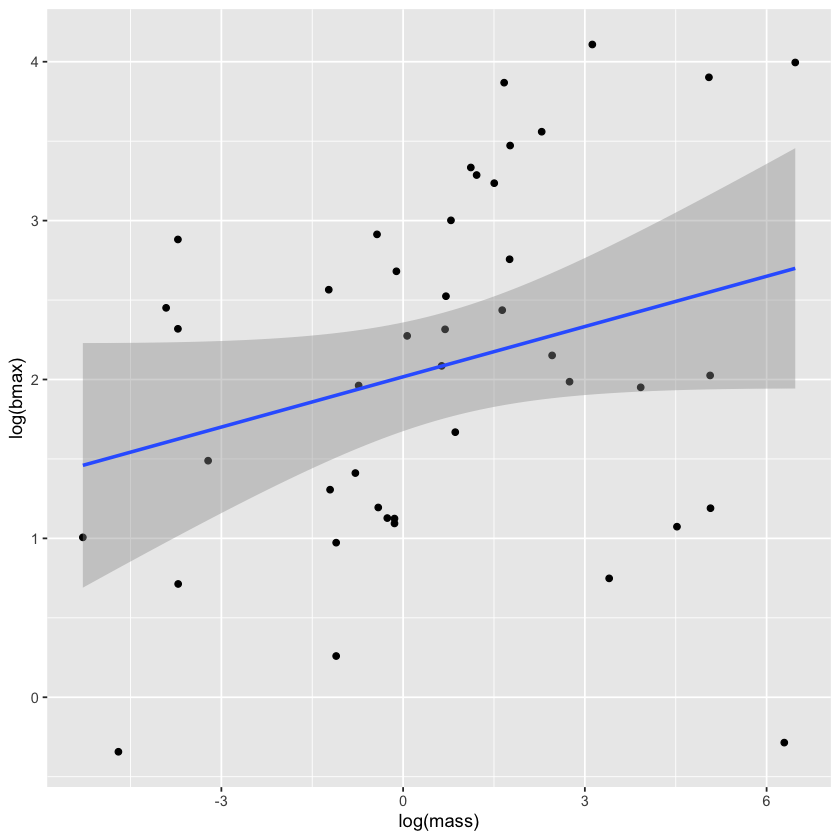

In [70]:
#plot uncorrected data in log-log scale
bmax_data %>%
  ggplot(aes(x=log(mass), y = log(bmax)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


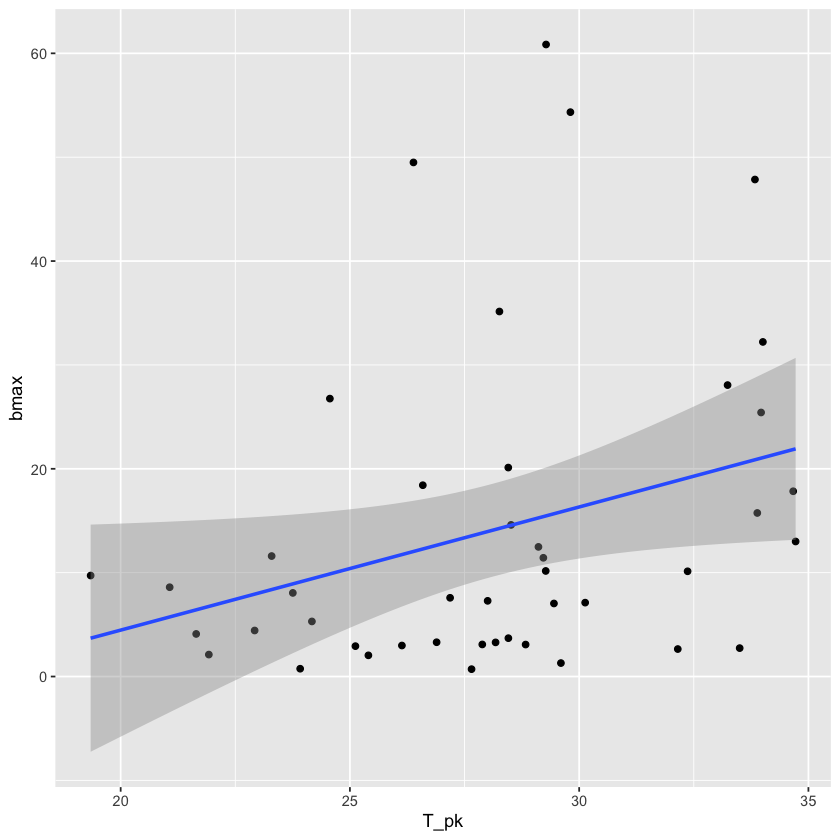

In [71]:
#plot b_pk vs T
bmax_data %>%
  ggplot(aes(x = T_pk, y = bmax)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [72]:
# linear model (note the allometry is linear in log-log scale)
bmax_model <- lm(log(bmax) ~ log(mass) + kT, data = bmax_data)
summary(bmax_model)
coef(bmax_model)

save(bmax_model,file="../results/bmax_MTE_model.Rdata")

bmax_cf <-  confint(bmax_model,level = .95)
anova(bmax_model)


Call:
lm(formula = log(bmax) ~ log(mass) + kT, data = bmax_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61749 -0.67561  0.07691  0.66216  1.60292 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 32.74425   11.94770   2.741  0.00904 **
log(mass)    0.11968    0.05461   2.192  0.03415 * 
kT          -0.79780    0.31018  -2.572  0.01383 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.029 on 41 degrees of freedom
Multiple R-squared:  0.2021,	Adjusted R-squared:  0.1631 
F-statistic: 5.191 on 2 and 41 DF,  p-value: 0.009781


(Intercept)   log(mass)          kT 
 32.7442479   0.1196797  -0.7977999

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,3.990815,3.990815,3.766902,0.05917270
kT,1,7.008638,7.008638,6.615405,0.01383124
Residuals,41,43.437127,1.059442,NA,NA


In [73]:
bmax_lm <- lm(log(bmax/mass^coef(bmax_model)[2]) ~ T_pk, data=bmax_data); summary(bmax_lm)
confint(bmax_lm,level = .95)


Call:
lm(formula = log(bmax/mass^coef(bmax_model)[2]) ~ T_pk, data = bmax_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61407 -0.67169  0.07079  0.65041  1.60650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.88807    1.10710  -0.802   0.4270  
T_pk         0.10302    0.03901   2.641   0.0116 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.016 on 42 degrees of freedom
Multiple R-squared:  0.1424,	Adjusted R-squared:  0.122 
F-statistic: 6.975 on 1 and 42 DF,  p-value: 0.01156


,2.5 %,97.5 %
(Intercept),-3.12229110,1.3461485
T_pk,0.02429729,0.1817425


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


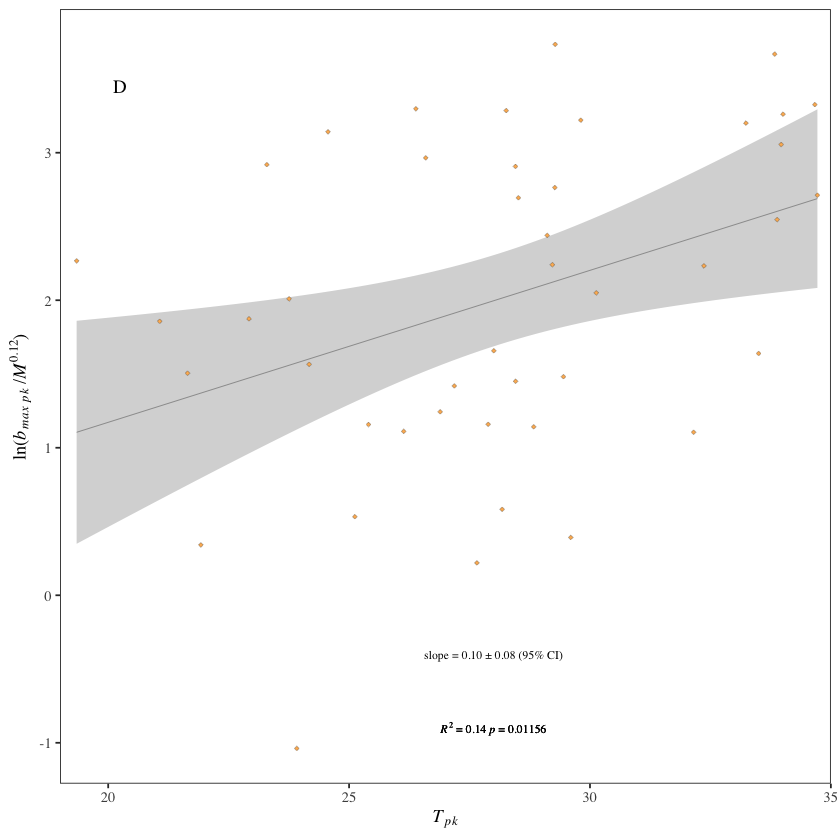

In [74]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedBmaxTpk <- 
  bmax_data %>%
  ggplot(aes(x = T_pk, y = log(bmax/mass^coef(bmax_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(b[max][' '][pk])~"/",
                                            italic(M^0.12),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits =c(19,35),
                     expand = c(0, 0),
                     breaks=seq(20,35, by=5))+  
  theme_bw()+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
                   panel.grid.minor = element_blank())+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 23, fill="#fdb863")+
  annotate("text", x = 20.25, y = 3.45, label = 'D', size=4, family='Times')+
  annotate("text", x = 28, y = -0.9, label = italic("R")^2~"= 0.14"~italic("p")~"= 0.01156", size=2.5, family='Times')+
  annotate("text", x = 28, y = -0.4, label = "slope = 0.10 ± 0.08 (95% CI)", size=2.5, family='Times')
 

MassCorrectedBmaxTpk

## Juvenile mortality rate ($z_j$)

In [75]:
# 2. Juvenile mortality rate (z_j)

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Thrips hawaiiensis' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Tetranychus mcdanieli' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Amblyseius womersleyi' ~ '13',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Aedes albopictus' ~ '45',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')


In [76]:
zjPk <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Thrips hawaiiensis' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Tetranychus mcdanieli' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Amblyseius womersleyi' ~ '13',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Aedes albopictus' ~ '45',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) 



Call:
lm(formula = log(zjpk) ~ T_pk, data = zj_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9474 -0.6251  0.3857  1.2049  2.7315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.24507    1.05141   -5.94 1.29e-06 ***
T_pk         0.05384    0.05279    1.02    0.315    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.857 on 32 degrees of freedom
Multiple R-squared:  0.03148,	Adjusted R-squared:  0.001214 
F-statistic:  1.04 on 1 and 32 DF,  p-value: 0.3154


`geom_smooth()` using formula = 'y ~ x'


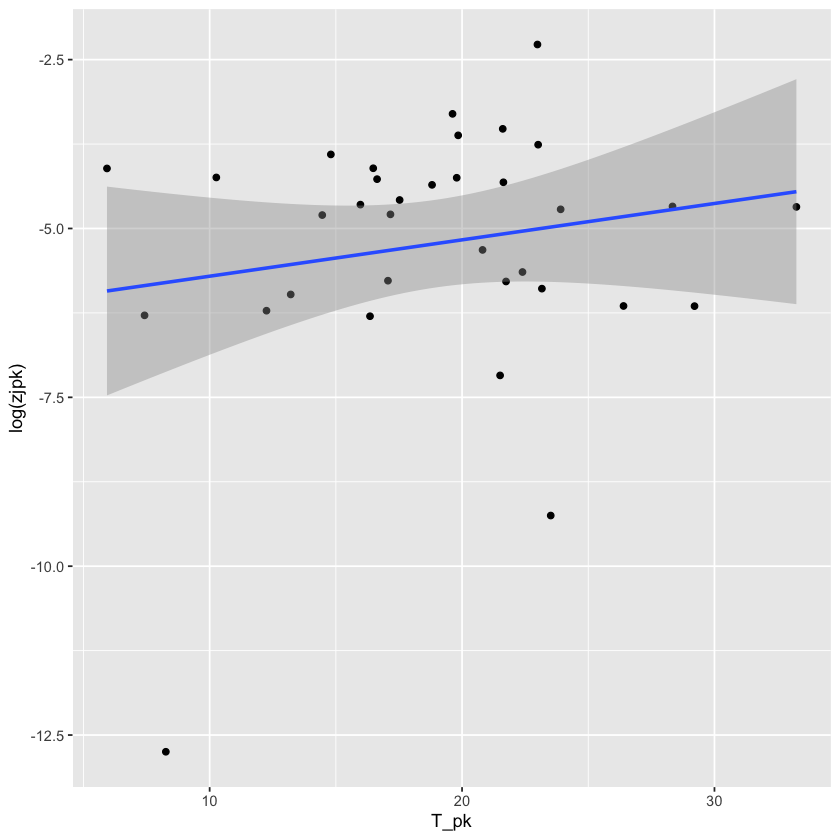

In [77]:
zj_pk <- zjPk %>% filter(param == 'rmax') %>% 
  rename(zjpk = estimate, zjpkLwr = conf_lower, zjpkUpr = conf_upper) %>% 
  select(zjpk, zjpkLwr, zjpkUpr, species, curve_ID) %>% mutate(zjpk = as.numeric(zjpk)) %>%
  mutate(zjpk = 1/zjpk, zjpkLwr = 1/zjpkLwr, zjpkUpr = 1/zjpkUpr)

T_pk <- zjPk %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

zj_data <- bind_cols(zj_pk, T_pk, bodyMass)

zj_data <- zj_data %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(zj_data, '../data/zj_pksT_pksMass.csv')

zj_model <- lm(log(zjpk) ~ T_pk, data = zj_data); summary(zj_model)

zj_data %>%
  ggplot(aes(x=T_pk,y = log(zjpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [78]:
zj_data <- as_tibble(read.csv('../data/zj_pksT_pksMass.csv')) # load in data 
zj_data$kT <- 1/(8.617333262145 * 10^-5 * (zj_data$T_pk+273.15))
head(zj_data)

zjpk,zjpkLwr,zjpkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.03107826,0.027807984,Thrips hawaiiensis,1,21.612,21.14294,22.15052,0.040000,39.36911
0.012854225,0.01486171,0.008982088,Bemisia tabaci,10,18.811,16.81676,21.03174,0.293125,39.74681
0.009275934,0.01199465,0.008001464,Tetraneura nigriabdominalis,11,33.246,25.64660,33.25892,0.867300,37.87425
0.016435073,0.01865326,0.014527593,Stethorus punctillum,12,16.481,15.12263,18.54681,0.480000,40.06656
0.102693969,0.12890800,0.087989777,Amblyseius womersleyi,13,22.987,17.64451,24.91169,0.005060,39.18632
0.014343249,0.01574338,0.012177272,Tetranychus urticae,14,10.264,9.62200,10.65974,0.024300,40.94547


`geom_smooth()` using formula = 'y ~ x'


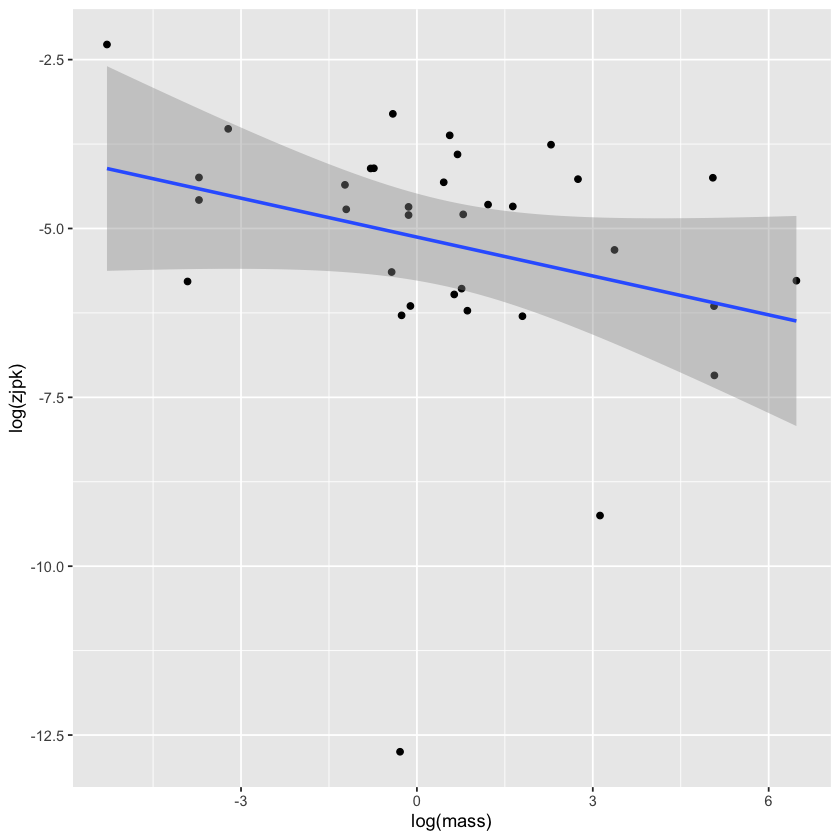

In [79]:
#plot uncorrected data in log-log scale
zj_data %>%
  ggplot(aes(x=log(mass), y = log(zjpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


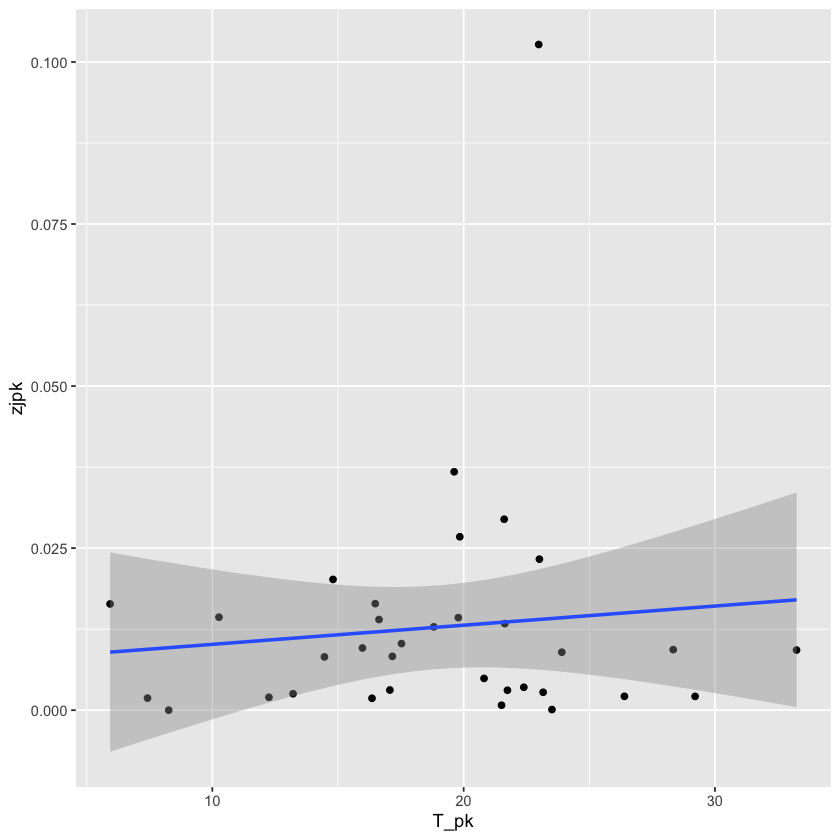

In [80]:
#plot zj_pk vs Tpk
zj_data %>%
  ggplot(aes(x = T_pk, y = zjpk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [81]:
# linear model (note the allometry is linear in log-log scale)
zj_model <- lm(log(zjpk) ~ log(mass) + kT, data = zj_data)
summary(zj_model)
coef(zj_model)

save(zj_model,file="../results/zj_MTE_model.Rdata")

b_cf <-  confint(zj_model,level = .95)
anova(zj_model)


Call:
lm(formula = log(zjpk) ~ log(mass) + kT, data = zj_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9210 -0.6028  0.4444  0.9961  1.8943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  15.4529    14.9892   1.031   0.3105  
log(mass)    -0.2167     0.1166  -1.859   0.0726 .
kT           -0.5175     0.3769  -1.373   0.1795  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.788 on 31 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.07468 
F-statistic: 2.332 on 2 and 31 DF,  p-value: 0.1139


(Intercept)   log(mass)          kT 
 15.4529331  -0.2167291  -0.5175476

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,8.877663,8.877663,2.777288,0.1056841
kT,1,6.028416,6.028416,1.885929,0.1795136
Residuals,31,99.092190,3.196522,NA,NA


In [82]:
zj_lm <- lm(log(zjpk/mass^coef(zj_model)[2]) ~ T_pk, data = zj_data); summary(zj_lm)
confint(zj_lm, level = .95)


Call:
lm(formula = log(zjpk/mass^coef(zj_model)[2]) ~ T_pk, data = zj_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9618 -0.6038  0.4544  0.9981  1.9045 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.41361    0.99797  -6.427 3.17e-07 ***
T_pk         0.06843    0.05011   1.366    0.182    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.763 on 32 degrees of freedom
Multiple R-squared:  0.05507,	Adjusted R-squared:  0.02554 
F-statistic: 1.865 on 1 and 32 DF,  p-value: 0.1816


,2.5 %,97.5 %
(Intercept),-8.44640791,-4.380817
T_pk,-0.03363426,0.170492


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


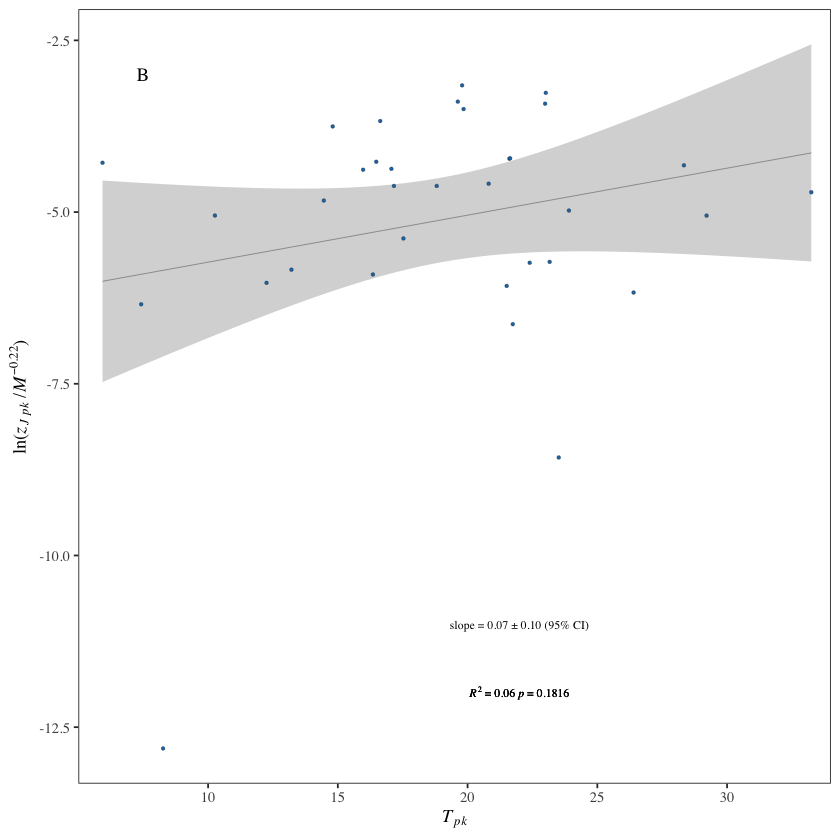

In [83]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedzjpkTpk <- 
  zj_data %>%
  ggplot(aes(x = T_pk, y = log(zjpk/mass^coef(zj_model)[2])))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(z[J][' '][pk])~"/",
                                                            italic(M^-0.22),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits =c(5,34),
                     expand = c(0, 0),
                     breaks=seq(10,30, by=5))+
  theme_bw()+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
                   panel.grid.minor = element_blank())+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 21, fill="#1f78b4")+
  annotate("text", x = 7.5, y = -3, label = 'B', size=4, family='Times')+
  annotate("text", x = 22, y = -12, label = italic("R")^2~"= 0.06"~italic("p")~"= 0.1816", size=2.5, family='Times')+
  annotate("text", x = 22, y = -11, label = "slope = 0.07 ± 0.10 (95% CI)", size=2.5, family='Times')
 


MassCorrectedzjpkTpk


## Adult mortality rate ($z$)

In [84]:
# 3. Adult mortality rate (z)

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Culex pipiens' ~ '1',
                              species == 'Plutella xylostella' ~ '2',
                              species == 'Thrips hawaiiensis' ~ '3',
                              species == 'Phenacoccus solenopsis' ~ '4',
                              species == 'Antestiopsis thunbergii' ~ '5',
                              species == 'Culex quinquefasciatus' ~ '6',
                              species == 'Halyomorpha halys' ~ '7',
                              species == 'Monochamus leuconotus' ~ '8',
                              species == 'Anthonomus grandis' ~ '9',
                              species == 'Paracoccus marginatus' ~ '10',
                              species == 'Aphis gossypii' ~ '12',
                              species == 'Tribolium castaneum' ~ '14',
                              species == 'Tetranychus mcdanieli' ~ '15',
                              species == 'Bemisia tabaci' ~ '16',
                              species == 'Tetraneura nigriabdominalis' ~ '17',
                              species == 'Stethorus punctillum' ~ '18',
                              species == 'Aedes krombeini' ~ '19',
                              species == 'Muscidifurax zaraptor' ~ '21',
                              species == 'Aphis nasturtii' ~ '22',
                              species == 'Rhopalosiphum maidis' ~ '23',
                              species == 'Anopheles gambiae' ~ '24',
                              species == 'Anoplophora glabripennis' ~ '25',
                              species == 'Helicoverpa armigera' ~ '26',
                              species == 'Aedes albopictus' ~ '27',
                              species == 'Trichogramma bruni' ~ '28',
                              species == 'Trichogramma sp. nr. Lutea' ~ '29',
                              species == 'Aedes aegypti' ~ '30',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')

In [85]:

zPk <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Culex pipiens' ~ '1',
                              species == 'Plutella xylostella' ~ '2',
                              species == 'Thrips hawaiiensis' ~ '3',
                              species == 'Phenacoccus solenopsis' ~ '4',
                              species == 'Antestiopsis thunbergii' ~ '5',
                              species == 'Culex quinquefasciatus' ~ '6',
                              species == 'Halyomorpha halys' ~ '7',
                              species == 'Monochamus leuconotus' ~ '8',
                              species == 'Anthonomus grandis' ~ '9',
                              species == 'Paracoccus marginatus' ~ '10',
                              species == 'Aphis gossypii' ~ '12',
                              species == 'Tribolium castaneum' ~ '14',
                              species == 'Tetranychus mcdanieli' ~ '15',
                              species == 'Bemisia tabaci' ~ '16',
                              species == 'Tetraneura nigriabdominalis' ~ '17',
                              species == 'Stethorus punctillum' ~ '18',
                              species == 'Aedes krombeini' ~ '19',
                              species == 'Muscidifurax zaraptor' ~ '21',
                              species == 'Aphis nasturtii' ~ '22',
                              species == 'Rhopalosiphum maidis' ~ '23',
                              species == 'Anopheles gambiae' ~ '24',
                              species == 'Anoplophora glabripennis' ~ '25',
                              species == 'Helicoverpa armigera' ~ '26',
                              species == 'Aedes albopictus' ~ '27',
                              species == 'Trichogramma bruni' ~ '28',
                              species == 'Trichogramma sp. nr. Lutea' ~ '29',
                              species == 'Aedes aegypti' ~ '30',
                              species == 'Scapsipedus icipe' ~ '46',
                              species == 'Hyperaspis notata' ~ '47',
                              species == 'Toxoptera citricida' ~ '48',
                              species == 'Ophraella communa' ~ '49',
                              species == 'Bemisia argentifolii' ~ '50',
                              species == 'Dactylopius austrinus' ~ '51',
                              species == 'Aulacorthum solani' ~ '52')) %>%
  arrange(curve_ID) 


In [86]:
z_pk <- zPk %>% filter(param == 'rmax') %>% 
  rename(zpk = estimate, zpkLwr = conf_lower, zpkUpr = conf_upper) %>% 
  select(zpk, zpkLwr, zpkUpr, species, curve_ID) %>% 
  mutate(zpk = 1/zpk, zpkLwr = 1/zpkLwr, zpkUpr = 1/zpkUpr)

T_pk <- zPk %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

z_data <- bind_cols(z_pk, T_pk, bodyMass)

z_data <- z_data %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(z_data, '../data/z_pksT_pksMass.csv')


Call:
lm(formula = log(zpk) ~ T_pk, data = z_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0093 -0.5184 -0.1908  0.6250  1.6550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.60245    0.58873  -6.119 7.69e-07 ***
T_pk        -0.02506    0.03226  -0.777    0.443    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8935 on 32 degrees of freedom
Multiple R-squared:  0.01851,	Adjusted R-squared:  -0.01216 
F-statistic: 0.6035 on 1 and 32 DF,  p-value: 0.4429


`geom_smooth()` using formula = 'y ~ x'


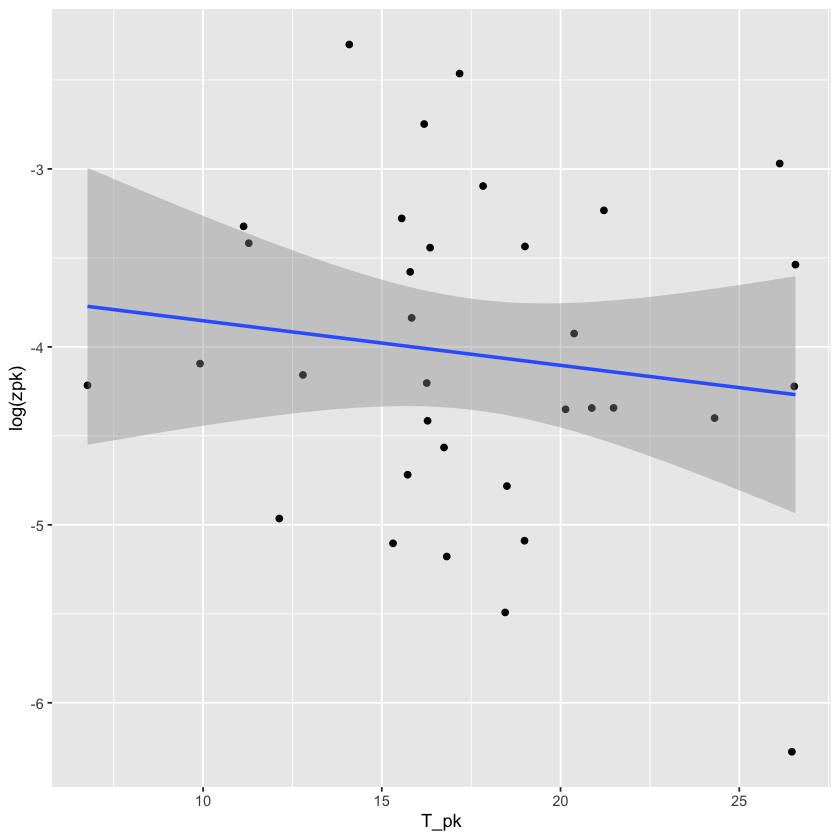

In [87]:
z_model <- lm(log(zpk) ~ T_pk, data = z_data); summary(z_model)

z_data %>%
  ggplot(aes(x=T_pk,y = log(zpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [88]:
z_data <- as_tibble(read.csv('../data/z_pksT_pksMass.csv')) # load in data 
z_data$kT <- 1/(8.617333262145 * 10^-5 * (z_data$T_pk+273.15))
head(z_data)

zpk,zpkLwr,zpkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.005638505,0.007768601,0.004680908,Culex pipiens,1,16.817,16.71100,16.85097,2.9200000,40.02013
0.021560283,0.026348713,0.019552732,Paracoccus marginatus,10,15.835,15.55992,18.11834,3.3650000,40.15613
0.032803103,0.033983297,0.032462923,Aphis gossypii,12,11.278,11.03872,11.48561,0.6633333,40.79949
0.001882355,0.002150609,0.001650687,Tribolium castaneum,14,26.472,25.64327,27.02264,2.1437500,38.73053
0.027919601,0.030037375,0.026057252,Tetranychus mcdanieli,15,15.794,14.16383,16.68443,0.0243000,40.16182
0.039444080,0.042020167,0.036418754,Bemisia tabaci,16,21.213,19.70719,22.24240,0.2931250,39.42248


`geom_smooth()` using formula = 'y ~ x'


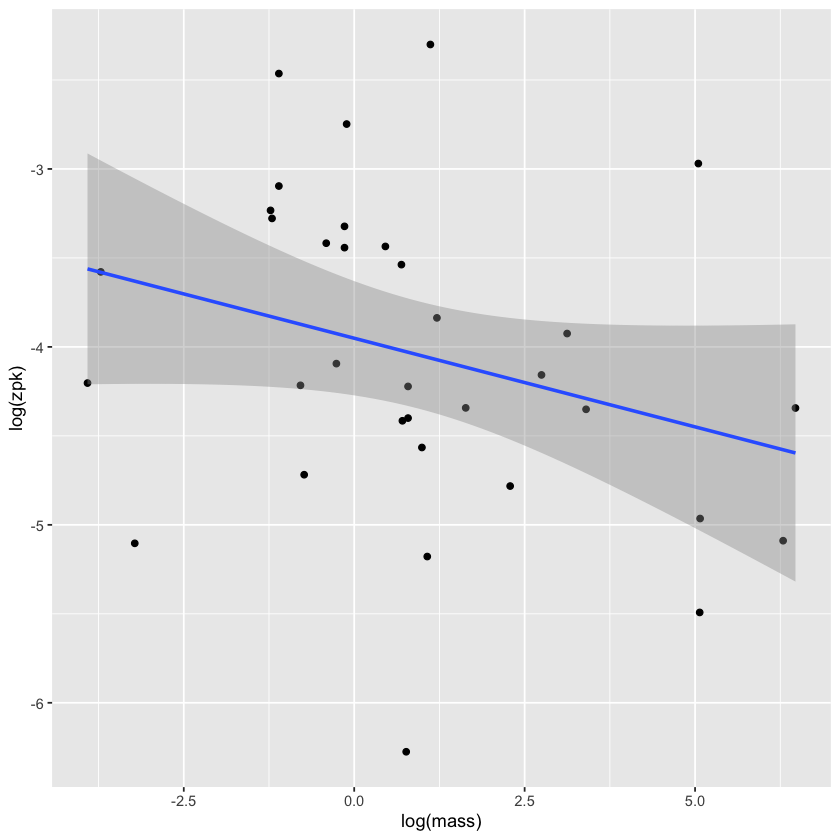

In [89]:
#plot uncorrected data in log-log scale
z_data %>%
  ggplot(aes(x=log(mass), y = log(zpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


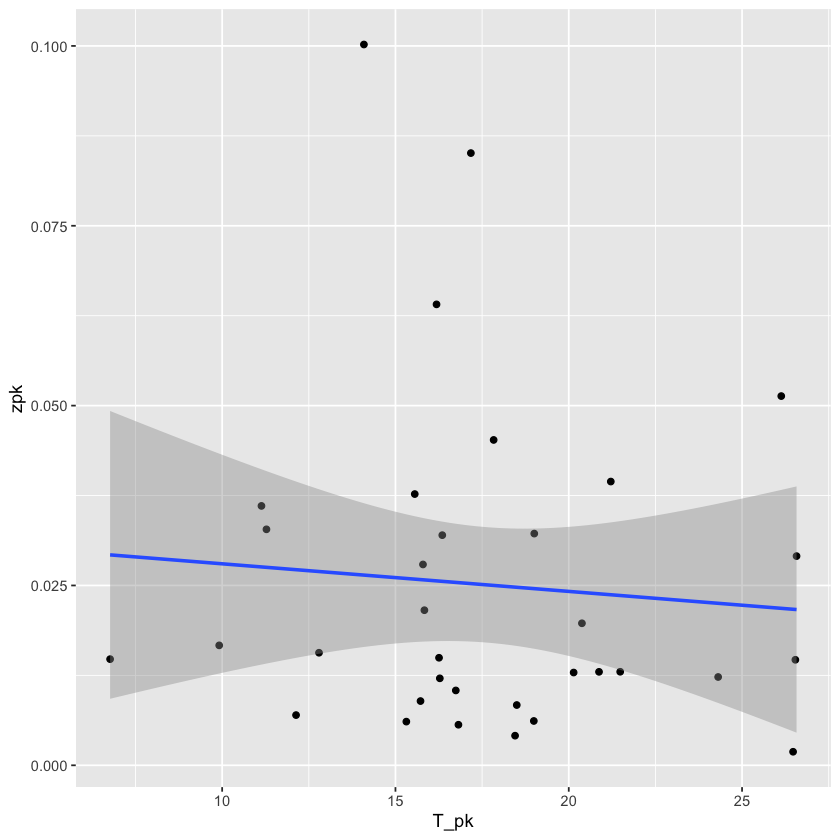

In [90]:
#plot z_pk vs Tpk
z_data %>%
  ggplot(aes(x = T_pk, y = zpk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [91]:
# linear model (note the allometry is linear in log-log scale)
z_model <- lm(log(zpk) ~ log(mass) + kT, data = z_data)
summary(z_model)
coef(z_model)

save(z_model,file="../results/z_MTE_model.Rdata")

z_cf <-  confint(z_model,level = .95)
anova(z_model)


Call:
lm(formula = log(zpk) ~ log(mass) + kT, data = z_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1508 -0.5251 -0.0212  0.5466  1.7222 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -7.18631    9.59010  -0.749    0.459
log(mass)   -0.09396    0.06137  -1.531    0.136
kT           0.08090    0.23981   0.337    0.738

Residual standard error: 0.8754 on 31 degrees of freedom
Multiple R-squared:  0.08719,	Adjusted R-squared:  0.0283 
F-statistic:  1.48 on 2 and 31 DF,  p-value: 0.2432


(Intercept)   log(mass)          kT 
-7.18631121 -0.09395884  0.08090487

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,2.18192900,2.18192900,2.8471769,0.1015732
kT,1,0.08722783,0.08722783,0.1138227,0.7381071
Residuals,31,23.75679504,0.76634823,NA,NA


In [92]:
z_lm <- lm(log(zpk/mass^coef(z_model)[2]) ~ T_pk, data = z_data); summary(z_lm)
confint(z_lm, level = .95)


Call:
lm(formula = log(zpk/mass^coef(z_model)[2]) ~ T_pk, data = z_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14677 -0.52576 -0.02174  0.54584  1.72100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.75704    0.56771  -6.618 1.84e-07 ***
T_pk        -0.01132    0.03111  -0.364    0.718    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8616 on 32 degrees of freedom
Multiple R-squared:  0.004123,	Adjusted R-squared:  -0.027 
F-statistic: 0.1325 on 1 and 32 DF,  p-value: 0.7183


,2.5 %,97.5 %
(Intercept),-4.9134275,-2.6006595
T_pk,-0.0746959,0.0520482


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


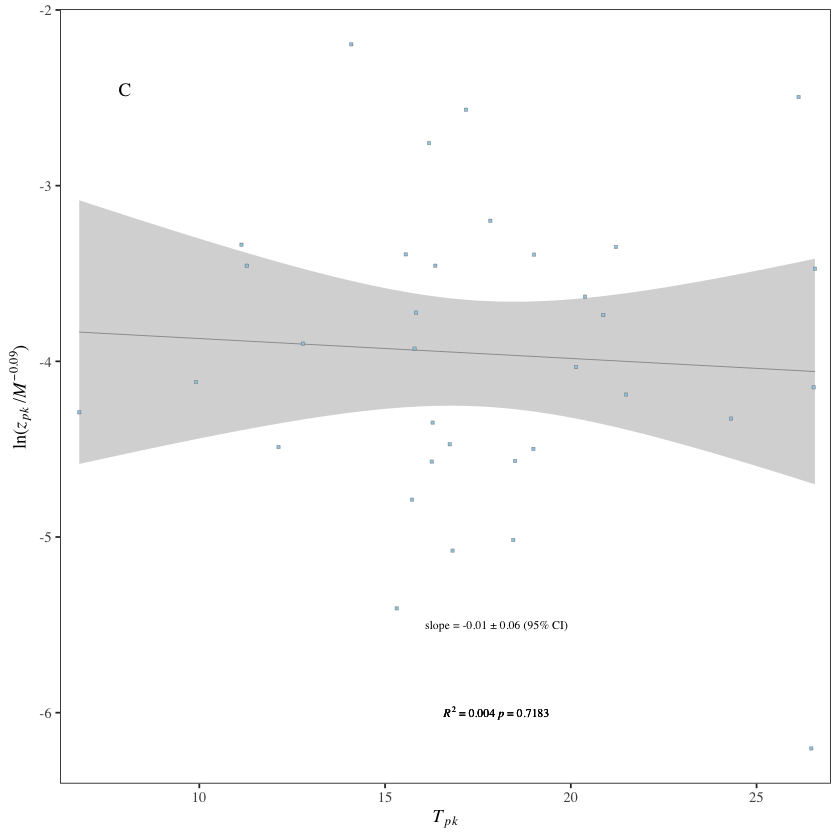

In [93]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedzpkTpk <- 
  z_data %>%
  ggplot(aes(x = T_pk, y = log(zpk/mass^coef(z_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(z[pk])~"/",italic(M^-0.09),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits=c(6.25,27),
                     expand = c(0, 0),
                     breaks=seq(10,25, by=5))+  
  theme_bw()+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
                   panel.grid.minor = element_blank())+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 22, fill="#a6cee3")+
  annotate("text", x = 8, y = -2.45, label = 'C', size=4, family='Times')+
  annotate("text", x = 18, y = -6, label = italic("R")^2~"= 0.004"~italic("p")~"= 0.7183", size=2.5, family='Times')+
  annotate("text", x = 18, y = -5.5, label = "slope = -0.01 ± 0.06 (95% CI)", size=2.5, family='Times')
 
MassCorrectedzpkTpk

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to n

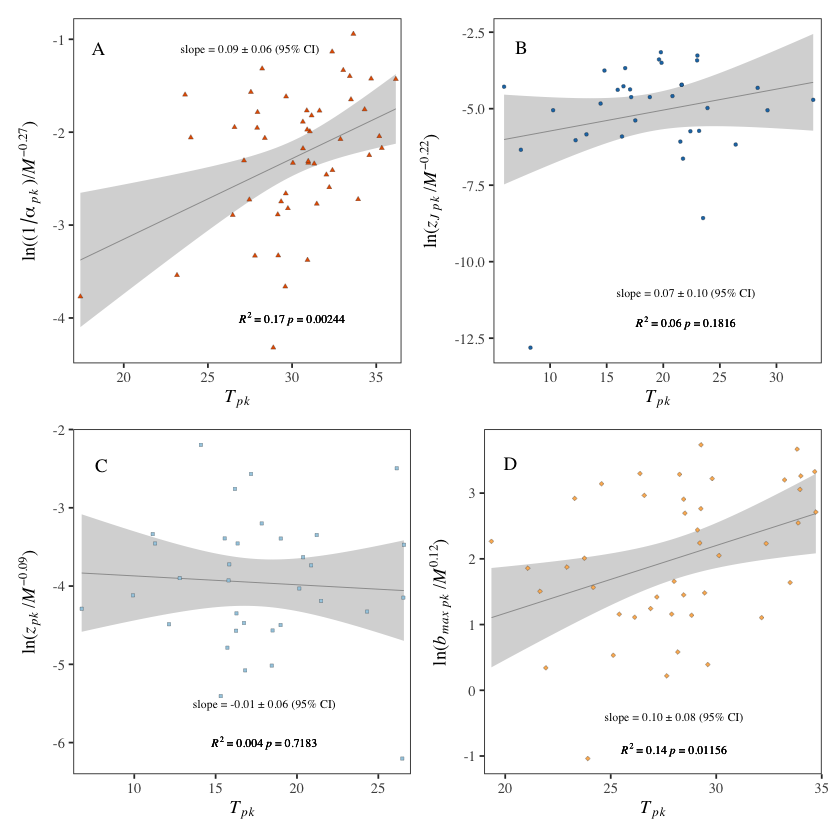

In [94]:
# Plot hotter-is-better panel 

p1 <- (MassCorrectedApkTpk+MassCorrectedzjpkTpk)/(MassCorrectedzpkTpk+MassCorrectedBmaxTpk); p1

save_plot(p1, file="../results/SI/Traits_HotterIsBetter.pdf", 
          base_height=10,base_width = 12, base_asp = 0.75,units="cm")